In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def process_fdc(filepath: str, column_name: str)-> pd.DataFrame:
    
    flow= pd.read_csv(filepath, index_col=0, sep='\t')
    flow= flow.drop(flow.index[0])
    
    # extract flow values
    values= flow[column_name].values

    # Convert values to a NumPy array if it's not already
    values = np.asarray(values)

    # Convert the values to numeric
    values = pd.to_numeric(values, errors='coerce')
    
    # Remove any value of -9999
    values = values[values != -9999]
    
    # Sort the values in descending order
    sorted_values = np.sort(values)[::-1]

    # Create a DataFrame with these values as a column
    fdc = pd.DataFrame(sorted_values, columns=[column_name])

    # Create a new column 'rank' with values from 1 to n
    fdc['rank'] = range(1, len(fdc) + 1)

        # calculate probability of occurance
    n= len(fdc['rank'])

    fdc['Probability of Exceedance'] = fdc['rank']/(n + 1)

    fdc['Probability of Non Exceedance'] = 1 - fdc['Probability of Exceedance'] 
    
    # Convert all values to numeric, errors='coerce' will convert non-numeric values to NaN
    fdc = fdc.applymap(pd.to_numeric, errors='coerce')
    
    
    
    return fdc



In [13]:
file_path= '../../model/model_versions/v_7/v_7_1/0058208.txt'

In [14]:
sim_fdc= process_fdc(file_path, 'cout')

In [15]:
obs_fdc= process_fdc(file_path, 'rout')

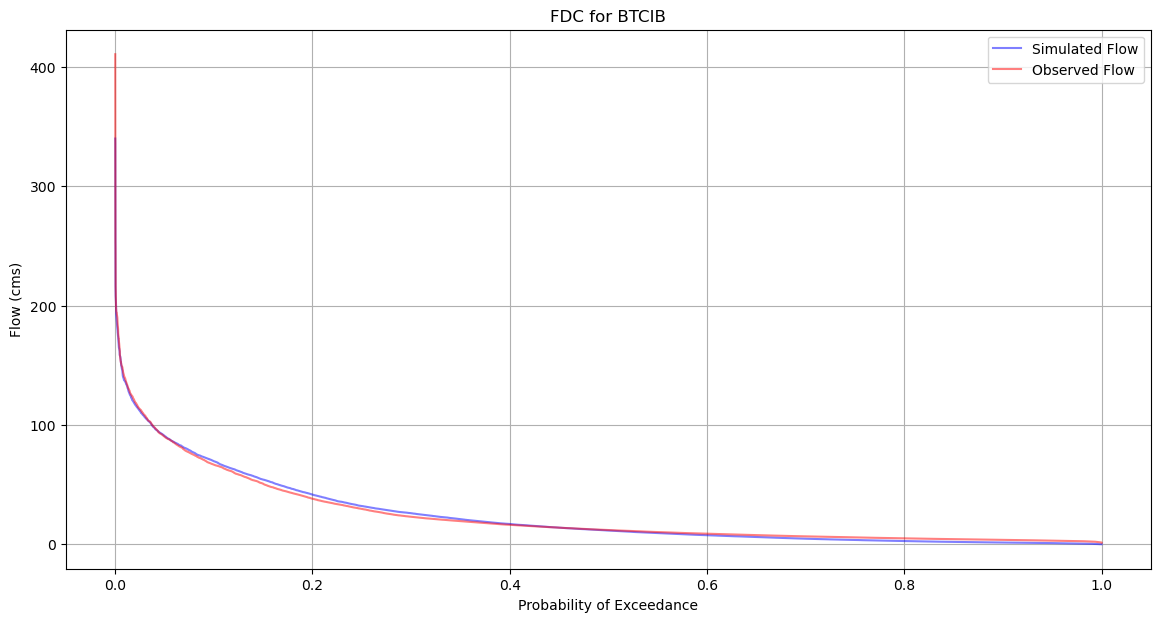

In [16]:
# Plot 'cout' vs 'Probability of Exceedance'
plt.figure(figsize=(14, 7))
plt.plot(sim_fdc['Probability of Exceedance'], sim_fdc['cout'], linestyle='-', color='b', label='Simulated Flow', alpha= 0.5)
plt.plot(obs_fdc['Probability of Exceedance'], obs_fdc['rout'], linestyle='-', color='r', label='Observed Flow', alpha= 0.5)

# Add labels and title
plt.xlabel('Probability of Exceedance')
plt.ylabel('Flow (cms)')
plt.title('FDC for BTCIB')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Save the plot as a PNG file
# plt.savefig('fdc_BTCIB.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()